***Taxi 🚕 Fare Prediction: Unlocking the Secrets Behind the Fare Meter
In this notebook, we embark on a comprehensive journey to understand and predict taxi fare prices using real-world data and advanced machine learning techniques. Our goal is not just to build an accurate model, but to uncover the underlying dynamics that drive fare pricing—much like how ride-hailing giants such as Uber, Lyft, or Ola do in real time.***

****🔍 What This Notebook Covers
Problem Statement:
We aim to predict the final fare of a taxi ride based on multiple features that can influence pricing decisions. These include:****

****Trip Distance – One of the primary drivers of fare; longer trips typically cost more, but we’ll explore if that’s always the case.****

****Travel Time – Heavily influenced by traffic, time of day, and route taken. We'll see how duration impacts pricing.****

****Weather Conditions – A variable often overlooked, but potentially significant. Do rainy or snowy conditions lead to higher fares?****

****Pickup and Drop-off Locations – Certain zones may have surge pricing or fixed base rates. We'll analyze how geography influences pricing.****

Date and Time – Time-based patterns like rush hour, weekends, or holidays can result in fare variation.

****Date and Time – Time-based patterns like rush hour, weekends, or holidays can result in fare variation.****

****Date and Time – Time-based patterns like rush hour, weekends, or holidays can result in fare variation.****

****And possibly other engineered features like day of the week, trip direction, and location clusters.****

****🧠 Real-World Context and Business Understanding
This project simulates the pricing logic of ride-hailing apps. These platforms use historical data and real-time context to:****

****Estimate prices before the ride even begins.****

****Apply dynamic pricing based on demand, location, and time.****

****Optimize routes and pricing to increase both customer satisfaction and driver earnings.****

****We’ll explore how these apps might weigh each factor and integrate them into predictive systems that learn from thousands of past rides.****

****📈 Outcome and Deliverables
Build a robust machine learning model to accurately estimate taxi fares.****



In [2]:
#Lets import necessary libraries and start our analysis and data cleaning .
import numpy as np
import pandas as pd 
df=pd.read_csv('/kaggle/input/taxi-price-prediction/taxi_trip_pricing.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


# **There are NAN values there that we need to remove them**

In [3]:

df=df.dropna()
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
14,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914
...,...,...,...,...,...,...,...,...,...,...,...
990,40.17,Evening,Weekday,3.0,Low,Clear,3.81,0.66,0.42,62.66,56.6394
992,14.34,Afternoon,Weekday,1.0,Medium,Clear,3.23,1.01,0.29,45.07,30.7837
994,18.69,Evening,Weekday,3.0,Medium,Clear,4.90,1.79,0.17,79.41,51.8548
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049


# Encoding 
* Since the dataset contains categorical columns we need to encode those values because our ml model will work only with the encoded values

* For this purpose we'll use OneHotEncoder and we will divide our dataset into 2 sets
* The first will contain only categorical values and these we are gonna encode
* The second set will contain only numerical values

* Atlast we'll join the 2 sets into a new cleaned dataset

In [4]:
from sklearn.preprocessing import OneHotEncoder
x=df.drop(columns=['Trip_Price'])
y=df['Trip_Price']

#Encoding the categorical columns 
cat_col=df[['Time_of_Day','Day_of_Week','Traffic_Conditions','Weather']]
encoder=OneHotEncoder(sparse=False)
encoded=encoder.fit_transform(cat_col)
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(cat_col.columns))
encoded_df



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
557,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
558,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
559,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
560,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [5]:
#Numerical columns are as follows
num_df=df[['Trip_Distance_km','Passenger_Count','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]
num_df
#Complete cleaned dataset as followa

nw_df=pd.concat([encoded_df,num_df],axis=1)
nw_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,36.87,1.0,2.70,1.21,0.15,37.27,52.9032
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.17,3.0,3.81,0.66,0.42,62.66,56.6394
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.34,1.0,3.23,1.01,0.29,45.07,30.7837
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.69,3.0,4.90,1.79,0.17,79.41,51.8548
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.49,4.0,2.39,0.62,0.49,58.39,34.4049


In [6]:
nw_df=nw_df.dropna()
nw_df

,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,36.87,1.0,2.70,1.21,0.15,37.27,52.9032
5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.64,2.0,2.55,1.71,0.48,89.33,60.2028
12,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,41.79,3.0,4.60,1.77,0.11,86.95,88.1328
14,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.91,2.0,2.32,1.26,0.34,41.72,28.9914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,42.76,2.0,4.85,1.29,0.17,67.92,71.5568
552,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,28.04,4.0,3.61,1.89,0.48,9.69,61.2568
556,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,7.57,3.0,3.42,1.70,0.23,103.80,40.1630
560,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,35.50,2.0,3.21,1.91,0.35,111.09,109.8965


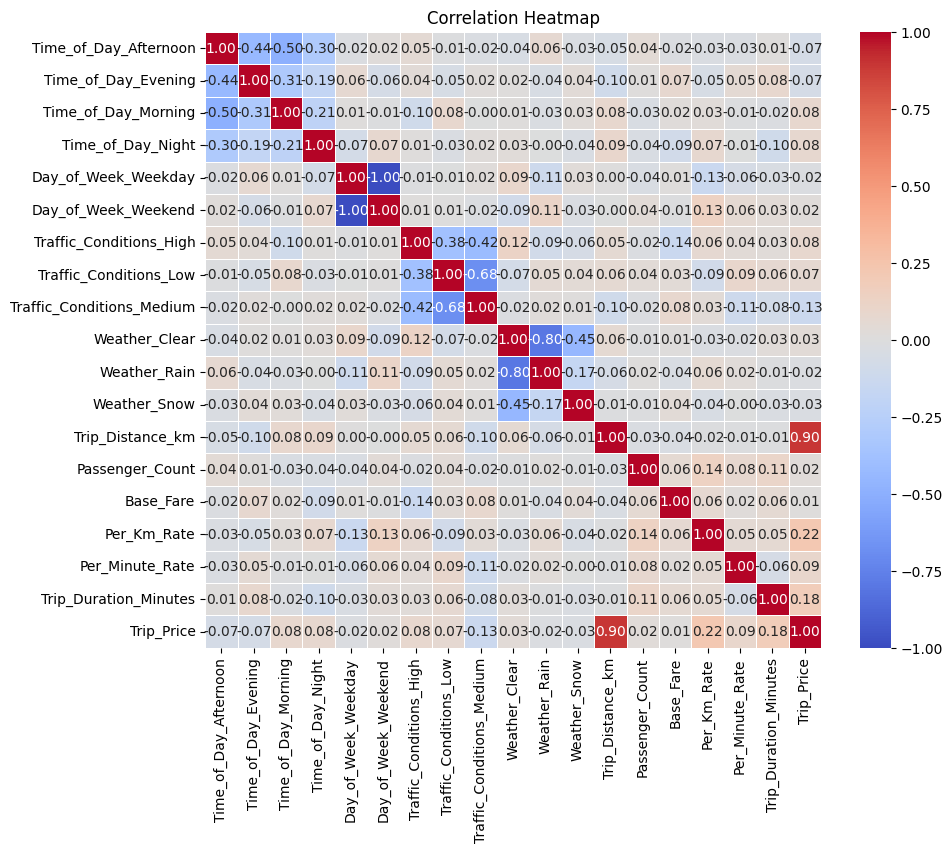

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = nw_df.corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Title and display
plt.title("Correlation Heatmap")
plt.show()


# Model selection 
* We are using LightGBM as our ml model for prediction
* LightGBM (Light Gradient Boosting Machine) is an open-source Python/C++ library that is optimized for speed and performance in training gradient boosting decision tree (GBDT) models.

🚀 Key Features of LightGBM:
Feature	Description
⚡ Fast training	Uses histogram-based algorithms, making it much faster than XGBoost on large datasets.
🧠 Lower memory usage	It uses less RAM compared to other boosting libraries.
🌲 Support for categorical features	Directly handles categorical variables without one-hot encoding.
🔁 Boosting type	Gradient Boosting, but can be used for regression, classification, ranking, etc.
🧮 Accuracy	Generally provides excellent results in Kaggle and real-world datasets.



In [7]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error  # choose based on task

X = nw_df.drop('Trip_Price', axis=1)
y = nw_df['Trip_Price']  # or whatever your target column is


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 246, number of used features: 18
[LightGBM] [Info] Start training from score 60.089503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

# Model Testing 
* Below is a sample data to predict the taxi price after our model training 

In [8]:
import pandas as pd

# Sample test input
test_data = pd.DataFrame([{
    'Time_of_Day_Afternoon': 0,
    'Time_of_Day_Evening': 1,
    'Time_of_Day_Morning': 0,
    'Time_of_Day_Night': 0,
    'Day_of_Week_Weekday': 1,
    'Day_of_Week_Weekend': 0,
    'Traffic_Conditions_High': 1,
    'Traffic_Conditions_Low': 0,
    'Traffic_Conditions_Medium': 0,
    'Weather_Clear': 0,
    'Weather_Rain': 1,
    'Weather_Snow': 0,
    'Trip_Distance_km': 12.5,
    'Passenger_Count': 2,
    'Base_Fare': 50,
    'Per_Km_Rate': 8,
    'Per_Minute_Rate': 2,
    'Trip_Duration_Minutes': 30
}])

predicted_price = model.predict(test_data)
print(f"Predicted Trip Price: {predicted_price[0]:.2f}")


Predicted Trip Price: 35.22


# Key Takeaways🔍:
LightGBM is a highly effective choice for structured/tabular data.**

**Proper tuning and validation techniques can substantially enhance results.**

**Evaluating feature importance can offer insights into model behaviour.**

**This model serves as a strong foundation for deployment via Streamlit or FastAPI to create user-friendly web apps.**


**🔍 Key Takeaways:LightGBM is a highly effective choice for structured/tabular data.Proper tuning and validation techniques can substantially enhance results.Evaluating feature importance can offer insights into model behaviour.This model serves as a strong foundation for deployment via Streamlit or FastAPI to create user-friendly web apps.🙏 Feedback & SupportThank you for viewing my notebook!Please let me know what you think about my work in the comments — your feedback helps me grow.And if you found this helpful or learned something new, I’d really appreciate an upvote! 💡👍**
